In [52]:
# Linear Algebra
import numpy as np

# Data Processing
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [53]:
kidney_data = pd.read_csv('DataSet.csv')

In [56]:
pd.set_option('display.max_columns',30)
kidney_data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification,eGFR,stages
0,0,48,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd,62.001841,2
1,1,7,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd,146.335929,1
2,2,62,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd,36.866485,3
3,3,48,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd,16.394927,4
4,4,51,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd,51.262906,3


In [57]:
kidney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    int64  
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              400 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [58]:
kidney_data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,eGFR,stages
count,400.000000,400.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,400.000000,313.000000,312.000000,348.000000,400.000000,400.000000
mean,199.500000,51.562500,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,2.997125,137.528754,4.627244,12.526437,62.984889,2.777500
std,115.614301,16.982996,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.628886,10.408752,3.193904,2.912587,49.535810,1.386651
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,0.493910,1.000000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,22.944047,2.000000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,56.051112,3.000000
75%,299.250000,64.000000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.725000,142.000000,4.900000,15.000000,86.878993,4.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,239.193317,5.000000


In [59]:
# Count of null values
kidney_data.isnull().sum()

id                  0
age                 0
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                  0
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
eGFR                0
stages              0
dtype: int64

In [60]:
# Extracting null cols
null_cols = kidney_data.columns[kidney_data.isnull().any()]

In [61]:
for cols in kidney_data.select_dtypes("object"):
    kidney_data[cols] = kidney_data[cols].astype("category")

In [62]:
kidney_data.drop('id',axis=1,inplace=True)

In [63]:

kidney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             400 non-null    int64   
 1   bp              388 non-null    float64 
 2   sg              353 non-null    float64 
 3   al              354 non-null    float64 
 4   su              351 non-null    float64 
 5   rbc             248 non-null    category
 6   pc              335 non-null    category
 7   pcc             396 non-null    category
 8   ba              396 non-null    category
 9   bgr             356 non-null    float64 
 10  bu              381 non-null    float64 
 11  sc              400 non-null    float64 
 12  sod             313 non-null    float64 
 13  pot             312 non-null    float64 
 14  hemo            348 non-null    float64 
 15  pcv             330 non-null    category
 16  wc              295 non-null    category
 17  rc              

In [64]:
df=kidney_data.copy()
df['age']=df['age'].fillna(df['age'].median())
df['sc']=df['sc'].fillna(df['sc'].median())
eGFR=[(186*pow((df['sc']/88.4),-1.154)*pow(df.age,-0.203)*0.742*1.210)/175.322]
stages=[]
for j in list(eGFR[0]):
    i=int(j)
    if i>=90:
        stages.append(1)
    if 60<=i<=89:
        stages.append(2)
    if 30<=i<=59:
        stages.append(3)
    if 15<=i<=29:
        stages.append(4)
    if i<15:
        stages.append(5)

In [65]:
cat_cols = []
for cols in kidney_data.select_dtypes("category"):
    cat_cols.append(cols)

In [66]:
cat_cols

['rbc',
 'pc',
 'pcc',
 'ba',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [67]:
value_count_lst = []
for col in kidney_data.select_dtypes("category"):
    value_count_lst.append(kidney_data[col].value_counts())

In [68]:
de_cols = ['classification','pcv','wc','rc','dm','cad']

In [69]:
for cols in kidney_data[de_cols]:
    kidney_data[cols] = kidney_data[cols].str.replace('\t',"")
    kidney_data[cols] = kidney_data[cols].replace("?",np.nan)
    kidney_data[cols] = kidney_data[cols].str.strip()

In [70]:
# Let us cross-check it with target feature "classification"
kidney_data.classification.value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

In [71]:
cat_num_cols = ["pcv","wc","rc"]
for col in kidney_data[cat_num_cols]:
    kidney_data[col] = kidney_data[col].astype("float")

In [72]:
cat_obj_cols = ["dm","cad","classification"]
for col in kidney_data[cat_obj_cols]:
    kidney_data[col] = kidney_data[col].astype("category")

In [73]:
kidney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             400 non-null    int64   
 1   bp              388 non-null    float64 
 2   sg              353 non-null    float64 
 3   al              354 non-null    float64 
 4   su              351 non-null    float64 
 5   rbc             248 non-null    category
 6   pc              335 non-null    category
 7   pcc             396 non-null    category
 8   ba              396 non-null    category
 9   bgr             356 non-null    float64 
 10  bu              381 non-null    float64 
 11  sc              400 non-null    float64 
 12  sod             313 non-null    float64 
 13  pot             312 non-null    float64 
 14  hemo            348 non-null    float64 
 15  pcv             329 non-null    float64 
 16  wc              294 non-null    float64 
 17  rc              

In [74]:

# Copying the dataframe "kidney_data" to dataframe "knn_df"
knn_df = kidney_data.copy()

In [75]:
# Categorical Columns
cat_cols = []
for col in knn_df.select_dtypes("category"):
    cat_cols.append(col)

In [76]:
kd_cat_df = pd.DataFrame(knn_df[cat_cols])

In [77]:
kd_cat_df.head()


,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [78]:
# Numerical Columns
num_cols = []
for col in knn_df.select_dtypes(['int64','float64']):
    num_cols.append(col)

In [79]:
kd_num_df = pd.DataFrame(knn_df[num_cols])

In [80]:
def random_imputation(df, feature):
    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature] = np.random.choice(observed_values, number_missing, replace = True)
    return df

In [81]:
for feature in num_cols:
    kd_num_df = pd.DataFrame(random_imputation(kd_num_df, feature))

In [82]:
# Imputing the categorical cols using mode
kd_cat_df[cat_cols] = kd_cat_df[cat_cols].fillna(kd_cat_df.mode().iloc[0])

kd_cat_df.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [83]:
# After imputation, copying the numerical and categorical columns to dataframe "kidney_data"

kidney_data[num_cols] = kd_num_df
kidney_data[cat_cols] = kd_cat_df

In [84]:
kidney_data.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
eGFR              0
stages            0
dtype: int64

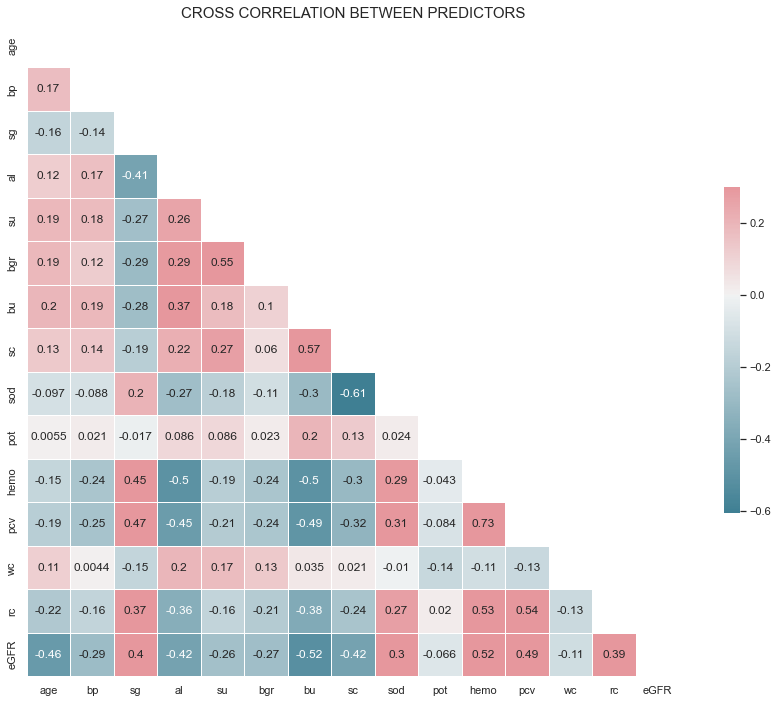

In [85]:
sns.set(style="white")

# Compute the correlation matrix
corr = kidney_data.iloc[:, :-1].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot= True);
plt.title("CROSS CORRELATION BETWEEN PREDICTORS", fontsize=15)
plt.show()

In [86]:
from sklearn.preprocessing import LabelEncoder

# target column
tgt_col = ['classification']

# Categorical cols
category_names = kidney_data.nunique()[kidney_data.nunique() < 20].keys().tolist()
category_names = [x for x in category_names if x not in tgt_col]

# Numerical cols
num_cols = [i for i in kidney_data.columns if i not in category_names + tgt_col]

# Binary cols
bin_cols = kidney_data.nunique()[kidney_data.nunique()==2].keys().tolist()

# Multi-cols
multi_cols = [i for i in category_names if i not in bin_cols]

# Label Encoding Binary cols
le = LabelEncoder()
for i in bin_cols:
    kidney_data[i] = le.fit_transform(kidney_data[i])
    
# Duplicating cols for multi-value columns
kidney_data = pd.get_dummies(data=kidney_data, columns=multi_cols)

In [88]:
kidney_data.head()

,age,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,...,al_2.0,al_3.0,al_4.0,al_5.0,su_0.0,su_1.0,su_2.0,su_3.0,su_4.0,su_5.0,stages_1,stages_2,stages_3,stages_4,stages_5
0,48,1,1,0,0,121.0,36.0,1.2,135.0,4.1,15.4,44.0,7800.0,5.2,1,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,7,1,1,0,0,105.0,18.0,0.8,141.0,5.6,11.3,38.0,6000.0,3.5,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2,62,1,1,0,0,423.0,53.0,1.8,142.0,6.3,9.6,31.0,7500.0,3.2,0,...,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,48,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,...,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
4,51,1,1,0,0,106.0,26.0,1.4,120.0,4.7,11.6,35.0,7300.0,4.6,0,...,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [89]:
cont_features = []
for features in kidney_data.select_dtypes(include=['int64','float64']):
    cont_features.append(features)

In [90]:
kd_df = kidney_data
# Scaling numerical features
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
kd_df[cont_features] = minmax.fit_transform(kd_df[cont_features].values)

In [91]:
kd_df.head()

,age,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,...,al_2.0,al_3.0,al_4.0,al_5.0,su_0.0,su_1.0,su_2.0,su_3.0,su_4.0,su_5.0,stages_1,stages_2,stages_3,stages_4,stages_5
0,0.522727,1,1,0,0,0.211538,0.088575,0.010582,0.823344,0.035955,0.836735,0.777778,0.231405,0.525424,1,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,0.056818,1,1,0,0,0.177350,0.042362,0.005291,0.861199,0.069663,0.557823,0.644444,0.157025,0.237288,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2,0.681818,1,1,0,0,0.856838,0.132221,0.018519,0.867508,0.085393,0.442177,0.488889,0.219008,0.186441,0,...,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,0.522727,1,0,1,0,0.202991,0.139923,0.044974,0.671924,0.000000,0.551020,0.511111,0.185950,0.305085,1,...,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
4,0.556818,1,1,0,0,0.179487,0.062901,0.013228,0.728707,0.049438,0.578231,0.577778,0.210744,0.423729,0,...,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [92]:
cols = [i for i in kd_df.columns if i not in tgt_col]
X = kd_df[cols]
Y=pd.DataFrame(stages,columns={'Stages'})
X.head()

,age,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,...,al_2.0,al_3.0,al_4.0,al_5.0,su_0.0,su_1.0,su_2.0,su_3.0,su_4.0,su_5.0,stages_1,stages_2,stages_3,stages_4,stages_5
0,0.522727,1,1,0,0,0.211538,0.088575,0.010582,0.823344,0.035955,0.836735,0.777778,0.231405,0.525424,1,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,0.056818,1,1,0,0,0.177350,0.042362,0.005291,0.861199,0.069663,0.557823,0.644444,0.157025,0.237288,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2,0.681818,1,1,0,0,0.856838,0.132221,0.018519,0.867508,0.085393,0.442177,0.488889,0.219008,0.186441,0,...,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,0.522727,1,0,1,0,0.202991,0.139923,0.044974,0.671924,0.000000,0.551020,0.511111,0.185950,0.305085,1,...,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
4,0.556818,1,1,0,0,0.179487,0.062901,0.013228,0.728707,0.049438,0.578231,0.577778,0.210744,0.423729,0,...,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [93]:
from sklearn.model_selection import KFold

In [94]:
# Create K-Folds
folds = KFold(n_splits=5, shuffle=True, random_state=0)

for train_index, test_index in folds.split(X,Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

In [101]:
#  MLPC CLASSIFIER

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(100,300,100,80,60,40,20,10), max_iter=30, activation='relu',solver='lbfgs',
                        verbose=20,  random_state=8,tol=0.001,alpha=0.003)
MLP.fit(X_train, Y_train)

MLPClassifier(alpha=0.003,
              hidden_layer_sizes=(100, 300, 100, 80, 60, 40, 20, 10),
              max_iter=30, random_state=8, solver='lbfgs', tol=0.001,
              verbose=20)

In [102]:
print("MLPClassifier Training Accuracy:",MLP.score(X_train, Y_train),"\n")

MLPClassifier Training Accuracy: 0.846875 



In [103]:
# CONFUSION MATRIX

from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,MLP.predict(X_test))

array([[20,  0,  0,  0,  0],
       [ 0, 21,  0,  2,  0],
       [ 0,  0, 14,  1,  0],
       [ 0,  0,  0,  9,  0],
       [ 0,  0, 11,  1,  1]], dtype=int64)

In [104]:
y_pred = MLP.predict(X_test)
print("Accuracy Score")
print(accuracy_score(Y_test, y_pred))

Accuracy Score
0.8125


In [105]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      0.91      0.95        23
           3       0.56      0.93      0.70        15
           4       0.69      1.00      0.82         9
           5       1.00      0.08      0.14        13

    accuracy                           0.81        80
   macro avg       0.85      0.78      0.72        80
weighted avg       0.88      0.81      0.77        80



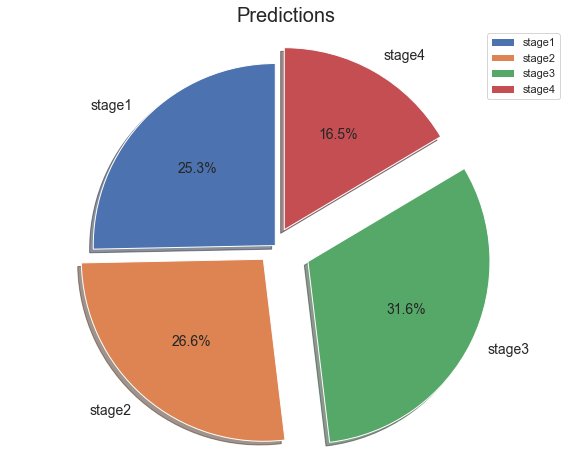

In [106]:
labels = 'stage1','stage2','stage3','stage4'
l=list(y_pred)
sizes = [l.count(1),l.count(2),l.count(3),l.count(4)]
explode = (0, 0.1,0.2,0.1)
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, 
       textprops={'fontsize':14})
ax.axis('equal')
plt.legend(loc='upper right')
plt.title("Predictions",size=20)
plt.show()